In [120]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [121]:
directions = {'N': np.array([0,1]), 'S': np.array([0,-1]),
              'E': np.array([1,0]), 'W': np.array([-1,0]),
              'NE': np.array([1,1]), 'NW': np.array([-1,1]),
              'SE': np.array([1,-1]), 'SW': np.array([-1,-1])}

In [122]:
class Walker:
    def __init__(self, S0, dS, j=1):
        self.steps = [S0]
        self.step_size = dS
        self.judgement = j

    def update_position(self, R1, R2, enemy_pos=None):
        if enemy_pos is None:
            next_step = self.__calculate_next_step(R1, R2)
        else:
            next_step = self.__calculate_next_step_with_enemy(R1, R2, enemy_pos)

        self.steps.append(next_step)

    def __calculate_next_step(self, R1, R2):
        assert R1.shape == self.steps[0].shape and R2.shape == self.steps[0].shape
        
        steps = [self.steps[-1] + self.step_size * d for d in directions.values()]
        errs = [np.mean([np.linalg.norm(step - R1), np.linalg.norm(step - R2)])
                for step in steps]
        idx = np.array(errs).argmin()
        
        return steps[idx]
    
    def __calculate_next_step_with_enemy(self, R1, R2, enemy_pos):
        assert R1.shape == self.steps[0].shape \
               and R2.shape == self.steps[0].shape \
               and enemy_pos.shape == self.steps[0].shape
        
        steps = [self.steps[-1] + self.step_size * d for d in directions.values()]
        errs = [np.average(a=[np.linalg.norm(step - R1),
                              np.linalg.norm(step - R2),
                              -np.linalg.norm(step-enemy_pos)],
                           weights=[1, 1, self.judgement])
                for step in steps]
        idx = np.array(errs).argmin()
        
        return steps[idx]

In [123]:
Refs = list(product([0,1], repeat=2))
r1, r2 = np.random.choice(len(Refs), size=2, replace=False)
Ref1, Ref2 = np.array(Refs[r1]), np.array(Refs[r2])

In [124]:
w1 = Walker(S0=np.random.uniform(size=2), dS=0.02, j=1.0)
w2 = Walker(S0=np.random.uniform(size=2), dS=0.025, j=1.1)

In [125]:
T = 100000

for _ in range(T):
    w1_pos = w1.steps[-1]
    w2_pos = w2.steps[-1]

    w1.update_position(Ref1, Ref2, enemy_pos=w2_pos)
    w2.update_position(Ref1, Ref2, enemy_pos=w1_pos)

In [126]:
ref_tweaks = {'s': 100}
w1_tweaks = {'color': 'red', 's': 64}
w2_tweaks = {'color': 'blue', 's': 64}

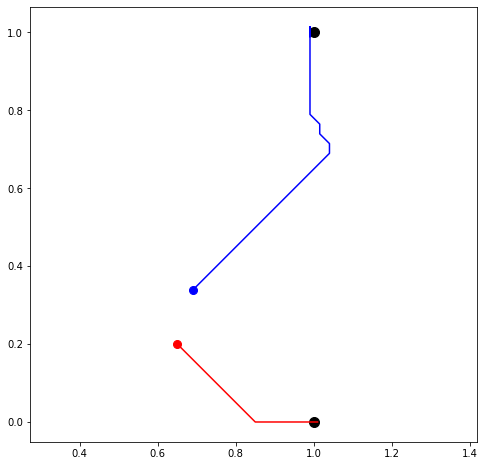

In [127]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(*Ref1, color='k', **ref_tweaks)
ax.scatter(*Ref2, color='k', **ref_tweaks)

xs, ys = zip(*w1.steps)
ax.scatter(*w1.steps[0], **w1_tweaks)
ax.plot(xs, ys, color='red')

xs, ys = zip(*w2.steps)
ax.scatter(*w2.steps[0], **w2_tweaks)
ax.plot(xs, ys, color='blue')

ax.axis('equal')
#ax.set_ylim([-0.1, 1.1])
#ax.set_xlim([-0.1, 1.1])

plt.show()